<a href="https://colab.research.google.com/github/OptimoCX/BootCampIA/blob/main/ClasificacionTumores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Nombre del laboratorio: Walter Hernandez
#“Detección de tumores con Redes Neuronales: clasificación binaria usando Keras”

Objetivo general del laboratorio:
Construir, entrenar y evaluar una red neuronal multicapa para clasificar tumores como malignos o benignos, utilizando un conjunto de datos real del ámbito médico. El propósito es comprender el flujo de trabajo típico de un proyecto de inteligencia artificial supervisada y reflexionar sobre la responsabilidad de su aplicación en contextos sensibles como la salud.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#Exploración del dataset
#Examinar el conjunto de datos y familiarizarse con sus columnas.

df = pd.read_csv('/content/sample_data/Cancer_data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [33]:
#Analizar la proporción de tumores malignos y benignos.
proporcion = df['diagnosis'].value_counts(normalize=True)*100
conteo = df['diagnosis'].value_counts()

resumen = pd.DataFrame(
    {'conteo': conteo,
     'proporcion':proporcion.round(2)}
).rename(index={'M': 'Maligno', 'B': 'Benigno'})

print(resumen)

           conteo  proporcion
diagnosis                    
Benigno       357       62.74
Maligno       212       37.26


In [34]:
!pip install ace_tools

In [36]:
# Crear nueva columna binaria: 1 = Maligno, 0 = Benigno
df['diagnosis_bin'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [38]:
# Select numeric columns
num_cols = df.select_dtypes(include='number').columns

# Calculate correlation of all numeric features with the diagnosis
correlation_with_target = df[num_cols].corr()['diagnosis_bin'].drop('diagnosis_bin').sort_values(ascending=False)

# Convert to DataFrame
correlation_summary = correlation_with_target.reset_index()
correlation_summary.columns = ['Feature', 'Correlation']

In [39]:
def classify_strength(c):
    if abs(c) >= 0.7:
        return 'Strong'
    elif abs(c) >= 0.3:
        return 'Mild'
    else:
        return 'Weak'

correlation_summary['Strength'] = correlation_summary['Correlation'].apply(classify_strength)

In [40]:
correlation_summary.style.background_gradient(cmap='RdBu', subset=['Correlation']) \
                     .set_caption("Correlación con el diagnóstico") \
                     .format({'Correlation': '{:.3f}'})

,Feature,Correlation,Strength
0,concave points_worst,0.794,Strong
1,perimeter_worst,0.783,Strong
2,concave points_mean,0.777,Strong
3,radius_worst,0.776,Strong
4,perimeter_mean,0.743,Strong
5,area_worst,0.734,Strong
6,radius_mean,0.730,Strong
7,area_mean,0.709,Strong
8,concavity_mean,0.696,Mild
9,concavity_worst,0.660,Mild


#2. Preprocesamiento

In [43]:
#2. Preprocesamiento
df_c = df.drop(columns=['diagnosis','fractal_dimension_se', 'id', 'symmetry_se', 'texture_se', 'fractal_dimension_mean', 'smoothness_se'])

In [45]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   radius_se                569 non-null    float64
 10  perimeter_se             569 non-null    float64
 11  area_se                  569 non-null    float64
 12  compactness_se           569 non-null    float64
 13  concavity_se             569 non-null    float64
 14  concave points_se        5

In [50]:
#Identify the y and x features
x = df_c.iloc[:, :-1] # Selecciona todas las columnas excepto la última (:-1) del DataFrame df.
y = pd.DataFrame(df_c['diagnosis_bin']) # Extrae la columna is_safe del DataFrame df. La convierte explícitamente en un nuevo DataFrame, no solo una Serie (aunque no es estrictamente necesario para muchos modelos).

In [51]:
#Normalizar las variables numéricas para que estén en un rango comparable.

#Normalizar o estandarizar las variables numéricas para facilitar el entrenamiento según FeaturesX. Según entiendo hacr esto antes de separar y de x puede generar perdida de información.
##StandardScaler - Care about the mean and std desviation from the sample
from sklearn.preprocessing import StandardScaler

# Crear el escalador
scalerSS = StandardScaler()
X_trainSS = scalerSS.fit_transform(X_train)
X_testSS = scalerSS.transform(X_test)



from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [52]:
x_scaled = sc.fit_transform(x)

In [54]:
pd.DataFrame(x_scaled)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.489734,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,0.499255,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,1.228676,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,0.326373,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,1.270543,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,2.782080,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,1.300499,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,0.184892,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.157935,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 0)

In [56]:
n_samples = x_train.shape[0]
n_features = x_train.shape[1]
print(f'n_samples: {n_samples}, n_features: {n_features}')

n_samples: 455, n_features: 25


## Construcción de la Red Neuronal tomando como base Sequencial de KERAS

In [57]:
# En Colab por ahora es necesario asegurar que la libreria KERAS quede instalada con todos los paquetes requeridos
!pip install keras

In [59]:
# Importando Keras con librerias y paquetes
from keras.layers import Dense
from keras.models import Sequential

In [60]:
from keras.models import Sequential
from keras.layers import Dense, Input

# Inicializar el modelo secuencial
my_classifier = Sequential()

# Capa de entrada + primera capa oculta
my_classifier.add(Input(shape=(n_features,)))  # n_features: número de variables predictoras
my_classifier.add(Dense(units=16, activation='relu'))  # Capa oculta 1

# Segunda capa oculta: permite a la red aprender patrones más profundos
my_classifier.add(Dense(units=8, activation='relu'))

# Tercera capa oculta: añade más capacidad de aprendizaje no lineal
my_classifier.add(Dense(units=20, activation='relu'))

# Capa de salida: para clasificación binaria, se usa sigmoid
my_classifier.add(Dense(units=1, activation='sigmoid'))

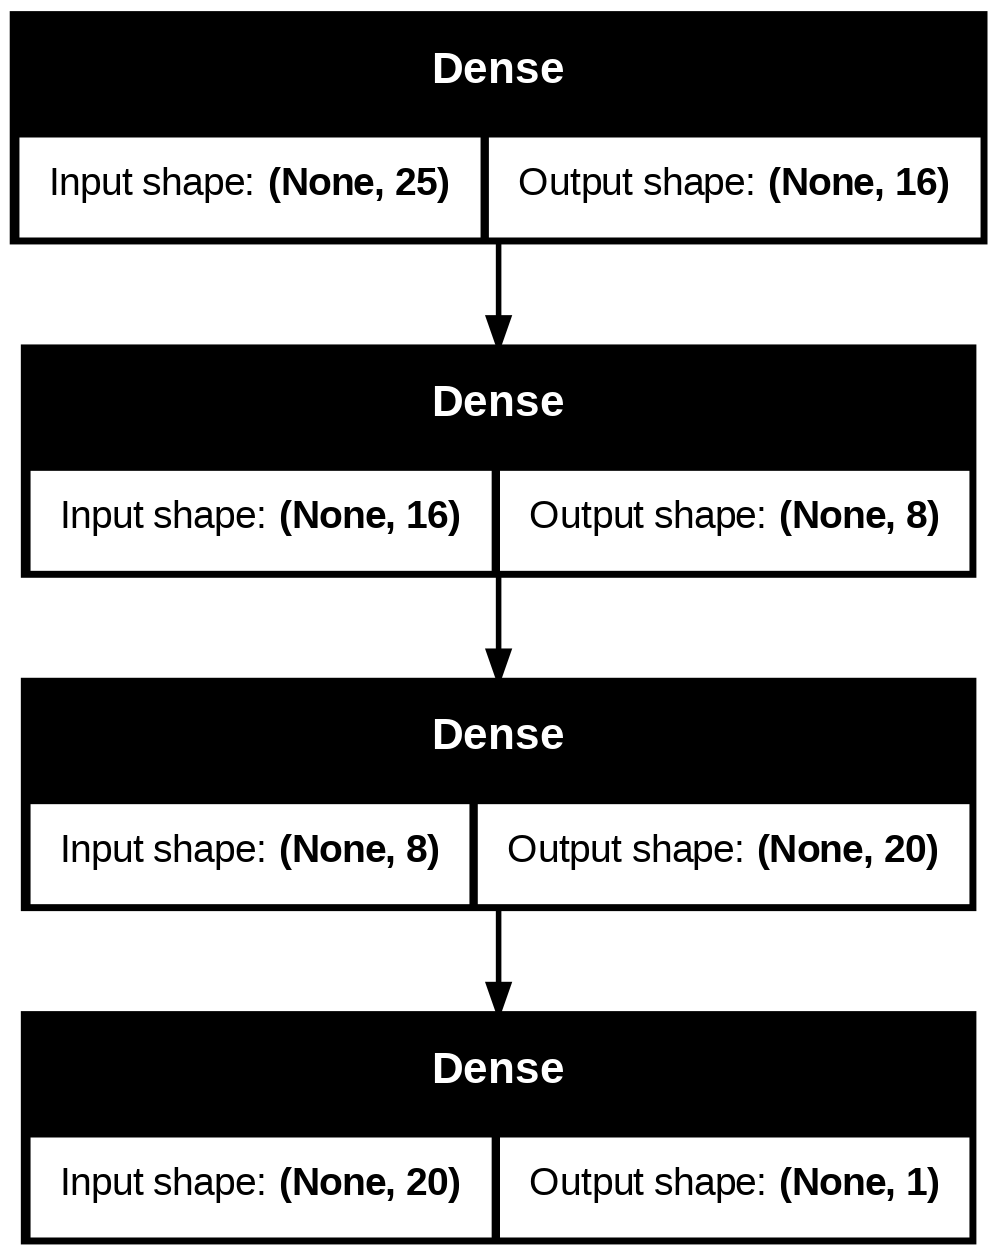

In [61]:
import tensorflow as tf
tf.keras.utils.plot_model(my_classifier, to_file='model.png', show_shapes=True) # Esta línea genera una imagen visual del modelo que estás construyendo (en este caso, my_classifier) y la guarda como un archivo .png.

## Compilar la Red Neuronal Artificial - ANN (Artificial Neural Network)

In [62]:
my_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                      metrics = ['accuracy'])

In [63]:
#Experimento Base 0
history = my_classifier.fit(x_train, y_train, validation_split=0.2,
                            batch_size = 10, epochs = 50)

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8942 - loss: 0.5771 - val_accuracy: 0.8901 - val_loss: 0.4264
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9360 - loss: 0.3512 - val_accuracy: 0.9341 - val_loss: 0.2699
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9289 - loss: 0.2557 - val_accuracy: 0.9560 - val_loss: 0.1848
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9534 - loss: 0.1715 - val_accuracy: 0.9670 - val_loss: 0.1333
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9711 - loss: 0.1194 - val_accuracy: 0.9890 - val_loss: 0.1064
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9673 - loss: 0.1277 - val_accuracy: 0.9890 - val_loss: 0.0890
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9770 - loss: 0.0869 - val_accuracy: 0.9890 - val_loss: 0.0746
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9633 - loss: 0.1198 - val_accuracy: 0.9890 - val_loss

In [64]:
y_pred_train = my_classifier.predict(x_train)
y_pred_train = (y_pred_train > 0.5) # Umbral para decidir la salidas binarias del módelo

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [65]:
df_comparacion = pd.DataFrame(x_train)
df_comparacion['Real_Label'] = y_train.values
df_comparacion['Predicted_Label'] = y_pred_train.astype(int)

df_comparacion.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,Real_Label,Predicted_Label
0,-1.158009,-0.409482,-1.135162,-0.978625,0.308838,-0.589031,-0.799618,-0.803976,0.286166,-0.517099,...,-1.050880,-0.872950,0.343297,-0.725613,-0.799692,-0.755486,-0.010929,-0.404858,0,0
1,-0.944998,0.626063,-0.954749,-0.838979,-0.594251,-0.889033,-0.661136,-0.899672,0.746185,-0.351797,...,-0.702088,-0.687490,-0.090679,-0.538588,-0.381348,-0.605352,0.103933,-0.405966,0,0
2,0.571638,-1.030809,0.507915,0.412710,-0.100363,-0.366351,-0.424349,-0.093868,-0.279730,-0.600833,...,0.257314,0.118337,-0.515887,-0.522048,-0.197603,-0.025980,-0.198592,-0.766169,0,0
3,-0.553058,-0.337343,-0.584037,-0.579597,0.579267,-0.640010,-0.802254,-0.503219,0.322675,-0.141019,...,-0.748256,-0.677470,-0.805204,-1.022181,-1.066914,-0.849434,-1.089989,-0.564455,0,0
4,-0.533178,0.733108,-0.567973,-0.535798,-1.027649,-0.991939,-0.899681,-0.936557,-0.977060,-0.654249,...,-0.432526,-0.452984,-0.296707,-0.469885,-0.715735,-0.780458,0.322334,-0.106167,0,0


In [68]:
y_pred_test = my_classifier.predict(x_test)
y_pred_test = (y_pred_test > 0.5)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [69]:
import pandas as pd

# Crear DataFrame con los datos de prueba
df_comparacion_test = pd.DataFrame(x_test)

# Añadir la etiqueta real
df_comparacion_test['Real_Label'] = y_test.values

# Añadir la etiqueta predicha (convertida a 0 o 1 si es necesario)
df_comparacion_test['Predicted_Label'] = y_pred_test.astype(int)

# Mostrar las primeras filas
df_comparacion_test.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,Real_Label,Predicted_Label
0,-0.206561,0.286311,-0.137124,-0.279260,1.013376,0.806556,0.699320,0.846065,1.111279,-0.052594,...,0.179870,-0.063607,1.097274,0.835474,1.143785,1.377912,1.106957,1.493688,1,1
1,-0.260524,1.387014,-0.324127,-0.332729,-0.601368,-0.990992,-0.766849,-0.728400,-0.703240,-0.710192,...,-0.475716,-0.435405,-0.152049,-0.941264,-0.638975,-0.830706,-0.738931,-0.890300,0,0
2,-0.030472,-0.844644,-0.097993,-0.137624,-1.188483,-0.919734,-0.852851,-0.577763,-0.812768,-0.689258,...,-0.319638,-0.336962,-1.269864,-0.970527,-1.005506,-0.494046,-1.237207,-0.933525,0,0
3,0.037691,-0.260550,-0.030853,-0.061970,-2.177683,-0.988149,-0.804137,-0.907410,-0.644825,-0.632233,...,-0.043523,-0.107027,-1.662195,-0.238966,-0.555018,-0.598500,-0.428317,-0.398208,0,0
4,-0.311646,-0.202373,-0.385500,-0.372831,-0.464730,-1.263703,-0.793214,-0.507861,-1.258183,-0.798617,...,-0.679153,-0.588344,-1.549975,-1.323648,-1.073966,-0.981753,-1.478256,-1.233324,0,0


##Construir una matriz de cinfussión

In [70]:
from sklearn.metrics import accuracy_score
# Calcular e imprimir accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy del modelo: {accuracy:.4f}")

Accuracy del modelo: 0.9737


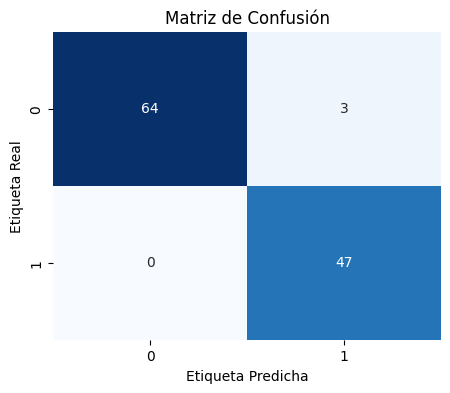

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_test)

# Graficar
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()

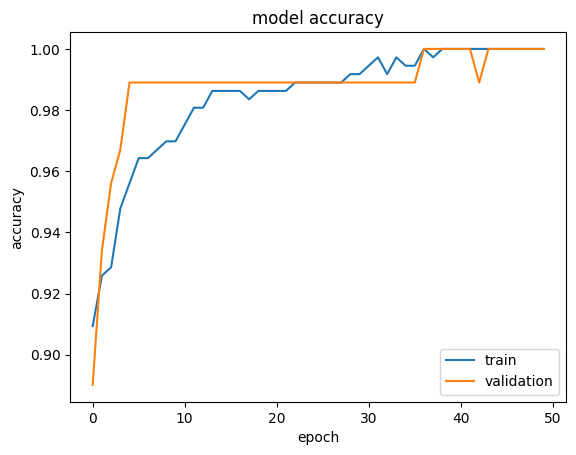

In [72]:
plt.subplots()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

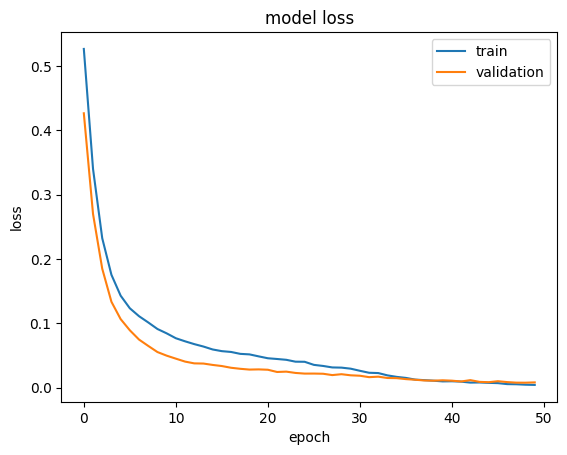

In [73]:
plt.subplots()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()